| **Chapter** | 2: Simple compartmental models |
| ------------- | --------------------------------- |
| **Computational Note** | 2.x: Jacobian stability analysis |
| **Package prerequisites** | SymPy |

# Jacobian stability analysis

\begin{equation}
    \frac{dS}{dt} = - \beta S I + \mu - \mu S
\end{equation}

\begin{equation}
    \frac{dI}{dt} = \beta S I - \gamma I - \mu I
\end{equation}

\begin{equation}
    \frac{dR}{dt} = \gamma I - \mu R
\end{equation}

In [2]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=True, wrap_line=True)
from sympy.matrices import Matrix
from sympy import symbols
from sympy import solve
import sympy
import numpy as np

In [3]:
S, I, R, R0, beta, gamma, mu = symbols('S I R R0 beta gamma mu')

In [4]:
state_vector = Matrix(np.array([- (beta * S * I) + mu - mu * S, (beta * S * I) - (gamma * I) - mu * I, (gamma * I) - mu * R]))

In [5]:
state_vector.jacobian(Matrix(np.array([S, I, R])))

In [6]:
state_vector.jacobian(Matrix(np.array([S, I, R]))).subs({"S": 1, "I": 0, "R": 0}).eigenvals()

In [19]:
state_vector.jacobian(Matrix(np.array([S, I, R]))).subs({"S": 1/R0,
                                                         "I": (mu / beta) * (R0 - 1), 
                                                "R": 1 - (1/R0) - (mu/beta)*(R0 - 1)}).subs({"R0": beta / (gamma + mu)})

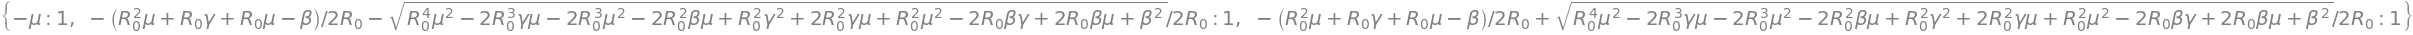

In [71]:
r.eigenvals(

In [72]:
A, G = symbols("A G")

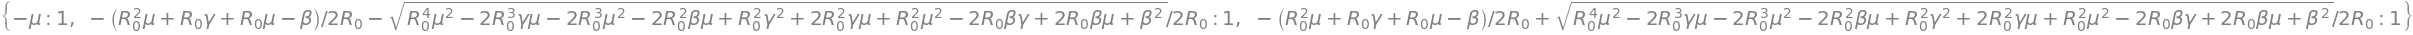

In [73]:
sympy.simplify(r.eigenvals()).subs({"1/(mu + gamma)": G,
                                    "1/(mu * (R0 - 1))": A})